In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [23]:
df = pd.read_csv("used_cars.csv")
df

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"
...,...,...,...,...,...,...,...,...,...,...,...,...
4004,Bentley,Continental GT Speed,2023,714 mi.,Gasoline,6.0L W12 48V PDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,C / C,Hotspur,None reported,Yes,"$349,950"
4005,Audi,S4 3.0T Premium Plus,2022,"10,900 mi.",Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,"$53,900"
4006,Porsche,Taycan,2022,"2,116 mi.",NaN,Electric,Automatic,Black,Black,None reported,NaN,"$90,998"
4007,Ford,F-150 Raptor,2020,"33,000 mi.",Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,"$62,999"


In [24]:
df = df.drop(['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title'], axis = 1)
df

,model_year,milage,price
0,2013,"51,000 mi.","$10,300"
1,2021,"34,742 mi.","$38,005"
2,2022,"22,372 mi.","$54,598"
3,2015,"88,900 mi.","$15,500"
4,2021,"9,835 mi.","$34,999"
...,...,...,...
4004,2023,714 mi.,"$349,950"
4005,2022,"10,900 mi.","$53,900"
4006,2022,"2,116 mi.","$90,998"
4007,2020,"33,000 mi.","$62,999"


In [26]:
# Define a custom function to remove the hyphen from the date column
def rmv(df):
    return df.str.replace(' mi.', '')

# Apply the custom function to the date column
df['milage'] = rmv(df['milage'])

print(df)

      model_year  milage     price
0           2013  51,000   $10,300
1           2021  34,742   $38,005
2           2022  22,372   $54,598
3           2015  88,900   $15,500
4           2021   9,835   $34,999
...          ...     ...       ...
4004        2023     714  $349,950
4005        2022  10,900   $53,900
4006        2022   2,116   $90,998
4007        2020  33,000   $62,999
4008        2020  43,000   $40,000

[4009 rows x 3 columns]


In [27]:
# Define a custom function to remove the hyphen from the date column
def rmv(df):
    return df.str.replace('$', '')

# Apply the custom function to the date column
df['price'] = rmv(df['price'])

print(df)

      model_year  milage    price
0           2013  51,000   10,300
1           2021  34,742   38,005
2           2022  22,372   54,598
3           2015  88,900   15,500
4           2021   9,835   34,999
...          ...     ...      ...
4004        2023     714  349,950
4005        2022  10,900   53,900
4006        2022   2,116   90,998
4007        2020  33,000   62,999
4008        2020  43,000   40,000

[4009 rows x 3 columns]


In [28]:
df

,model_year,milage,price
0,2013,"51,000","10,300"
1,2021,"34,742","38,005"
2,2022,"22,372","54,598"
3,2015,"88,900","15,500"
4,2021,"9,835","34,999"
...,...,...,...
4004,2023,714,"349,950"
4005,2022,"10,900","53,900"
4006,2022,"2,116","90,998"
4007,2020,"33,000","62,999"


In [29]:
df = df.replace({',': ''}, regex=True)
df = df.apply(lambda x: x.astype(int))
print(df)

      model_year  milage   price
0           2013   51000   10300
1           2021   34742   38005
2           2022   22372   54598
3           2015   88900   15500
4           2021    9835   34999
...          ...     ...     ...
4004        2023     714  349950
4005        2022   10900   53900
4006        2022    2116   90998
4007        2020   33000   62999
4008        2020   43000   40000

[4009 rows x 3 columns]


In [30]:
df

,model_year,milage,price
0,2013,51000,10300
1,2021,34742,38005
2,2022,22372,54598
3,2015,88900,15500
4,2021,9835,34999
...,...,...,...
4004,2023,714,349950
4005,2022,10900,53900
4006,2022,2116,90998
4007,2020,33000,62999


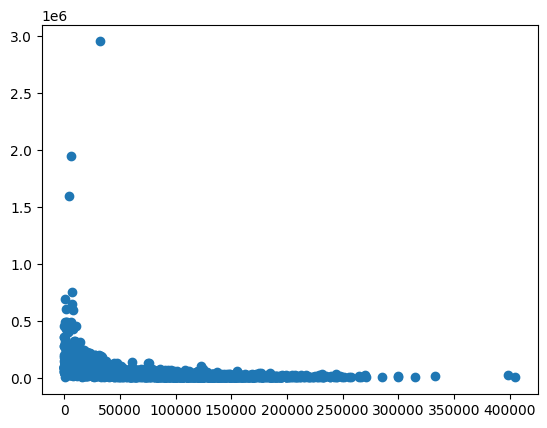

In [31]:
%matplotlib inline
plt.scatter(df['milage'], df['price'])

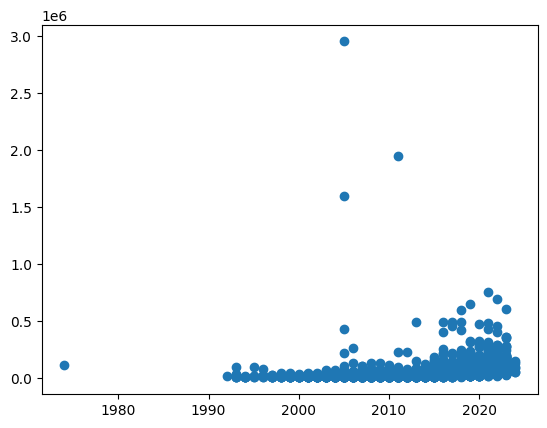

In [32]:
plt.scatter(df['model_year'], df['price'])

In [34]:
df

,model_year,milage,price
0,2013,51000,10300
1,2021,34742,38005
2,2022,22372,54598
3,2015,88900,15500
4,2021,9835,34999
...,...,...,...
4004,2023,714,349950
4005,2022,10900,53900
4006,2022,2116,90998
4007,2020,33000,62999


In [35]:
x = df[['model_year', 'milage']]
y = df['price']

In [36]:
from sklearn.model_selection import train_test_split

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.01)

In [54]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [55]:
model.fit(x_train, y_train)

LinearRegression()

In [56]:
x_test

,model_year,milage
3548,2014,82978
505,2023,2950
2866,2009,87130
1766,2013,18950
1697,2023,1090
678,2005,114000
312,2020,25721
2880,2022,12940
1682,2016,52375
3485,2015,72200


In [57]:
y_test

3548     18700
505      87000
2866     20000
1766     77999
1697     68750
678      13450
312      52645
2880     46999
1682     48600
3485     52500
3834     71900
3717     13500
2697      9500
2507     10995
717      44000
3164     44990
485      28000
1952     18995
2137     11500
1065     59000
1596     57352
248      37900
2117     25382
2597     12468
1900     17000
2753     11200
1659     59800
2993     26500
2442     37700
1093     19000
63       23998
3665     13700
759     210000
1390     15999
2280     32612
3860     37000
1946     22000
3579      7000
1926     32950
1982     45000
3296     92000
Name: price, dtype: int32

In [58]:
model.score(x_test, y_test)

0.24012643982617787